### Importing the data 


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")

from sklearn.utils import shuffle

In [2]:
df=pd.read_csv('Churn.csv',encoding='utf-8')

df=shuffle(df,random_state=42)

### Understanding the data

In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.iloc[1,:]

customerID                         0484-JPBRU
gender                                   Male
SeniorCitizen                               0
Partner                                    No
Dependents                                 No
tenure                                     41
PhoneService                              Yes
MultipleLines                             Yes
InternetService                            No
OnlineSecurity            No internet service
OnlineBackup              No internet service
DeviceProtection          No internet service
TechSupport               No internet service
StreamingTV               No internet service
StreamingMovies           No internet service
Contract                       Month-to-month
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          25.25
TotalCharges                           996.45
Churn                                      No
Name: 2715, dtype: object

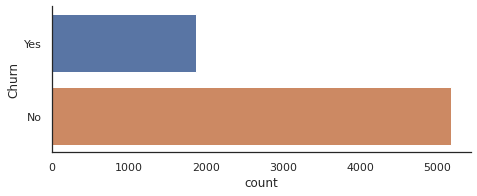

In [6]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in the data. (No NaN values)


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


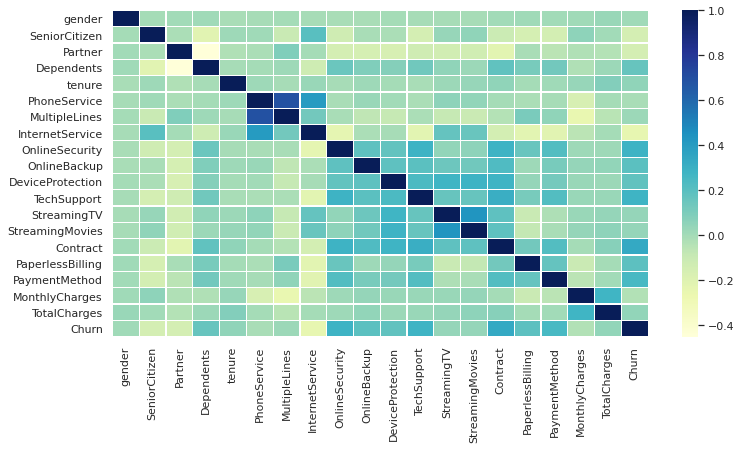

In [10]:
plt.figure(figsize=(12, 6))
hm=df.drop(['customerID'],
        axis=1, inplace=False)
corr = hm.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

In [11]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
185   1024-GUALD  Female              0  ...          24.80         24.8    Yes
2715  0484-JPBRU    Male              0  ...          25.25       996.45     No
3825  3620-EHIMZ  Female              0  ...          19.35       1031.7     No
1807  6910-HADCM  Female              0  ...          76.35        76.35    Yes
132   8587-XYZSF    Male              0  ...          50.55       3260.1     No
...          ...     ...            ...  ...            ...          ...    ...
3772  0684-AOSIH    Male              0  ...          95.00           95    Yes
5191  5982-PSMKW  Female              0  ...          91.10       2198.3     No
5226  8044-BGWPI    Male              0  ...          21.15       306.05     No
5390  7450-NWRTR    Male              1  ...          99.45      1200.15    Yes
860   4795-UXVCJ    Male              0  ...          19.80        457.3     No

[7043

In [12]:
df.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
9995-HOTOH  Male    0              Yes      Yes         63      No            No phone service  DSL              Yes                  Yes                  Yes                  No                   Yes                  Yes                  Two year        No                Electronic check           59.00           3707.6        No       1
3370-HXOPH  Female  0              No       No          3       Yes           Yes               Fiber optic      No                   No                   No                   No                   No                   No                   Month-to-month  No                Electronic check           76.10           257.6  

In [13]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

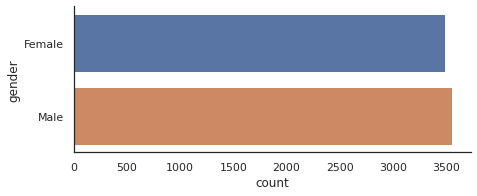

In [14]:
ax = sns.catplot(y="gender", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

# Data Manipulation and Visualization

In [15]:
categorical_cols=['gender',
'Partner',
'Dependents',
'PhoneService',
'MultipleLines',
'InternetService',
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies',
'Contract',
'PaperlessBilling',
'PaymentMethod',
'SeniorCitizen']

In [16]:
df[categorical_cols].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
SeniorCitizen       2
dtype: int64

Since data definition is not given,
in the StreamingMovies Variable, assuming that No internet service is a valid input and maps to the correct pattern (is not a value that needs to be replaced by Yes/No). Assuming that same goes for other categorical variables that have values like No phone service and No internet service.

In [17]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.65      8
          ..
6172       1
826        1
293.65     1
6273.4     1
81         1
Name: TotalCharges, Length: 6531, dtype: int64

In [18]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
31.00      1
39.05      1
109.00     1
105.80     1
112.90     1
Name: MonthlyCharges, Length: 1585, dtype: int64

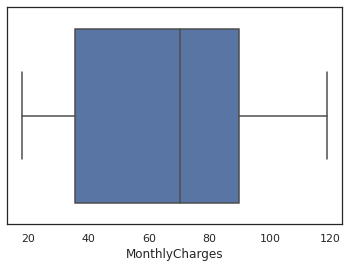

In [19]:
sns.boxplot(df['MonthlyCharges'])

In [20]:
df['TotalCharges'].describe

<bound method NDFrame.describe of 185        24.8
2715     996.45
3825     1031.7
1807      76.35
132      3260.1
         ...   
3772         95
5191     2198.3
5226     306.05
5390    1200.15
860       457.3
Name: TotalCharges, Length: 7043, dtype: object>

In [21]:
df['TotalCharges'][:10]

185        24.8
2715     996.45
3825     1031.7
1807      76.35
132      3260.1
1263     6127.6
3732     1759.4
1672    5016.65
811     7250.15
2526       19.4
Name: TotalCharges, dtype: object

In [430]:
#df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [22]:
for i in range(len(df)):
  try:
    df['TotalCharges'][i]=pd.to_numeric(df['TotalCharges'][i])
  except:
    df=df.drop(labels=[i],axis=0)

In [23]:
df['TotalCharges'].dtype

dtype('O')

In [24]:
df.shape

(7032, 21)

In [25]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [26]:
df['TotalCharges'][764:767]

1433     593.85
4412    1699.15
620       362.6
Name: TotalCharges, dtype: object

In [27]:
df['TotalCharges'].describe

<bound method NDFrame.describe of 185        24.8
2715     996.45
3825     1031.7
1807      76.35
132      3260.1
         ...   
3772         95
5191     2198.3
5226     306.05
5390    1200.15
860       457.3
Name: TotalCharges, Length: 7032, dtype: object>

In [28]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [30]:
df['TotalCharges'].dtype

dtype('float64')

In [31]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Converted TotalCharges to float64 type and removed those rows that were of string type and non convertable.

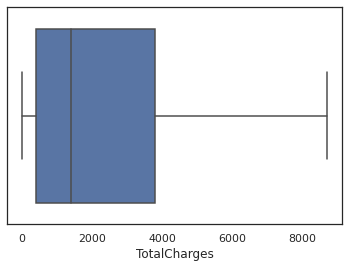

In [32]:
sns.boxplot(df['TotalCharges'])

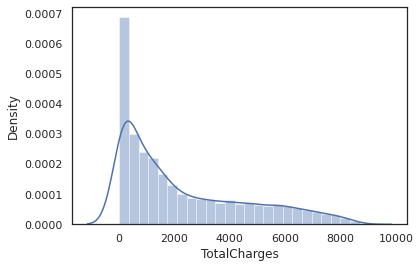

In [34]:
sns.distplot(df['TotalCharges'])

Presence of outliers in TotalCharges variable

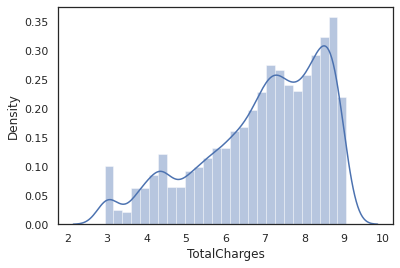

In [35]:
x=np.log(df['TotalCharges'])
sns.distplot(x)

In [36]:
q1=df['TotalCharges'].quantile(0.25)
q3=df['TotalCharges'].quantile(0.75)
q3,q1

(3794.7375, 401.45)

In [37]:
iqr=q3-q1
iqr

3393.2875000000004

In [38]:
whiskerup=q3+1.5*iqr
whiskerup

8884.66875

In [39]:
df['TotalCharges'].max()

8684.8

In [40]:
cap=df['TotalCharges'].quantile(0.9)
cap

5976.640000000001

In [41]:
print(df['TotalCharges'].mode(),df['TotalCharges'].median())

0    20.2
dtype: float64 1397.475


Capping the values of outlier at 6000 (decided from graph) because replacing them with mode or median or applying any other outlier management technique would introduce irregularities in the pattern because the Total Charges are supposed to be high for some of the entries because it is an accumuation of charges throughout the tenure. 

Replacing it with mode or median would mean that the total charges are very low for those entries that might have a high tenure or high monthly charges which would bring inaccuracy to the model.

In [42]:
df['TotalCharges'][df['TotalCharges']>cap]=cap

In [43]:
df['TotalCharges'].max()

5976.640000000001

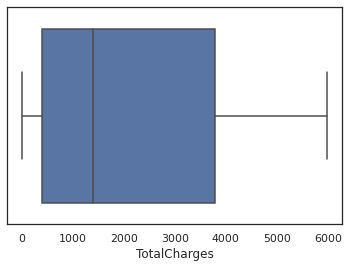

In [45]:
sns.boxplot(df['TotalCharges'])


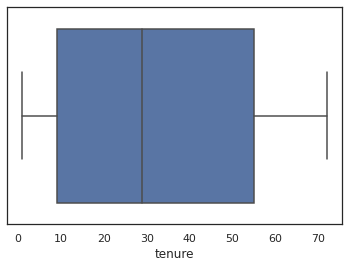

In [46]:
sns.boxplot(df['tenure'])

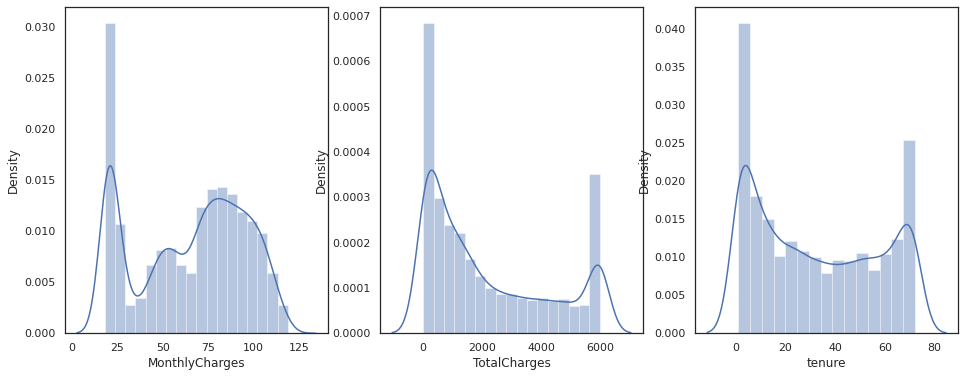

In [47]:
# Numerical Features
fig, (ax1, ax2 , ax3) = plt.subplots(ncols=3, figsize=(16, 6))
sns.distplot(df['MonthlyCharges'], ax = ax1)
sns.distplot(df['TotalCharges'], ax = ax2)
sns.distplot(df['tenure'], ax = ax3)
plt.show()

Normalizing numerical features

In [48]:
df['TotalCharges']/=df['TotalCharges'].max()
df['MonthlyCharges']/=df['MonthlyCharges'].max()
df['tenure']/=df['tenure'].max()

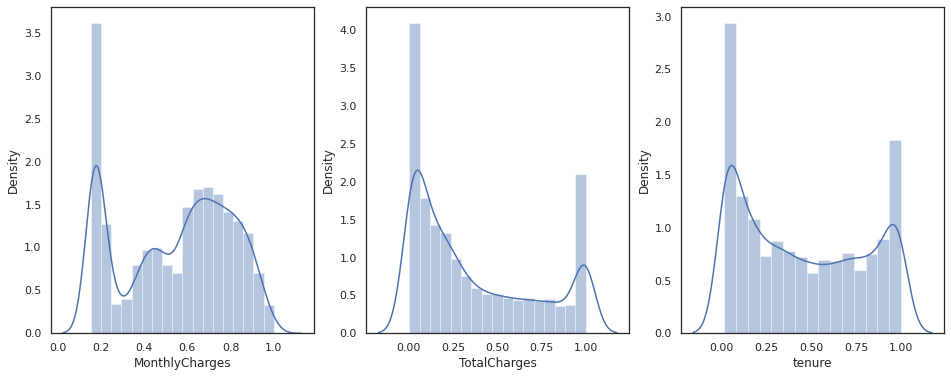

In [49]:
# Numerical Features
fig, (ax1, ax2 , ax3) = plt.subplots(ncols=3, figsize=(16, 6))
sns.distplot(df['MonthlyCharges'], ax = ax1)
sns.distplot(df['TotalCharges'], ax = ax2)
sns.distplot(df['tenure'], ax = ax3)
plt.show()

As expected, graph doesn't change because normalization doesn't change the relative distance between the points.

In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.208842,0.004149,Yes
2715,0484-JPBRU,Male,0,No,No,0.569444,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),0.212632,0.166724,No
3825,3620-EHIMZ,Female,0,Yes,Yes,0.722222,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.162947,0.172622,No
1807,6910-HADCM,Female,0,No,No,0.013889,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,0.642947,0.012775,Yes
132,8587-XYZSF,Male,0,No,No,0.930556,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),0.425684,0.545474,No


In [51]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

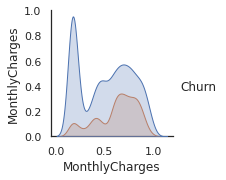

In [52]:
sns.pairplot(df,vars=['MonthlyCharges'],hue ='Churn',plot_kws={'alpha':0.1})

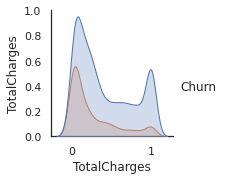

In [53]:
sns.pairplot(df,vars=['TotalCharges'],hue ='Churn',plot_kws={'alpha':0.1})

In [54]:
def kdeplot(feature):
    plt.figure(figsize=(10,5))
    plt.title("KDE Plot for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 0][feature], color= 'dodgerblue', label= 'Churn - 0')
    ax1 = sns.kdeplot(df[df['Churn'] == 1][feature], color= 'orange', label= 'Churn - 1')

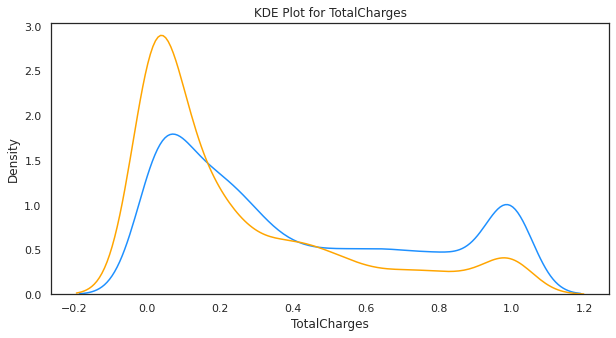

In [55]:
kdeplot('TotalCharges')

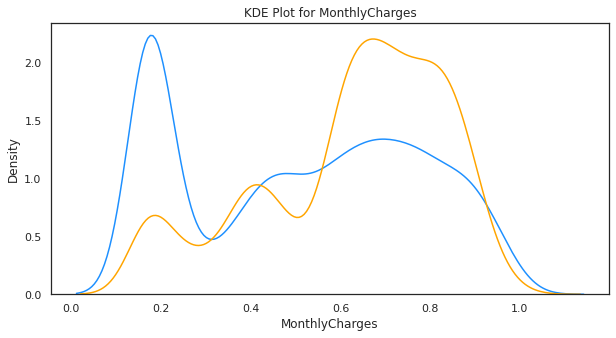

In [56]:
kdeplot('MonthlyCharges')

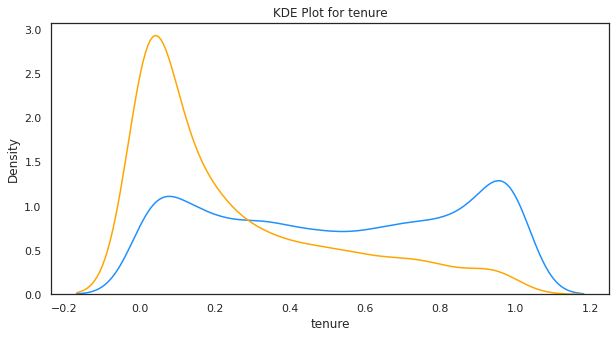

In [57]:
kdeplot('tenure')

In [58]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [59]:
cat_cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']

### Univariate Analysis

In [61]:
def unigraph(feature):
  color = sns.color_palette()
  int_level = df[feature].value_counts()
  plt.figure(figsize=(8,4))
  sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
  plt.ylabel('Number of Occurrences', fontsize=12)
  plt.xlabel(feature, fontsize=12)
  plt.show()

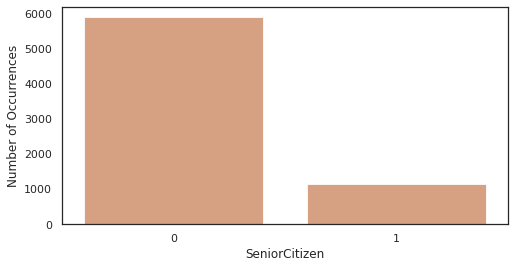

In [62]:
unigraph('SeniorCitizen')

Most data belongs to people who are not senior citizens

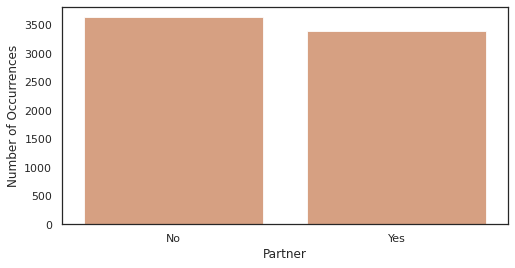

In [63]:
unigraph('Partner')

There is an even distribution of married and single people in the data.

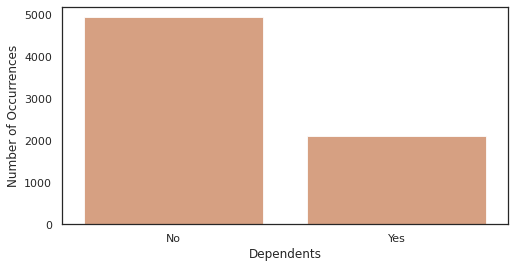

In [65]:
unigraph('Dependents')

Most people in the data don't have people who are dependent on them.

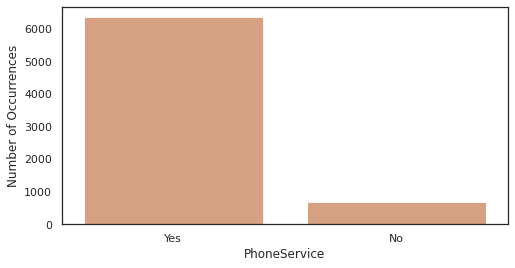

In [66]:
unigraph('PhoneService')

Most people have a phone service

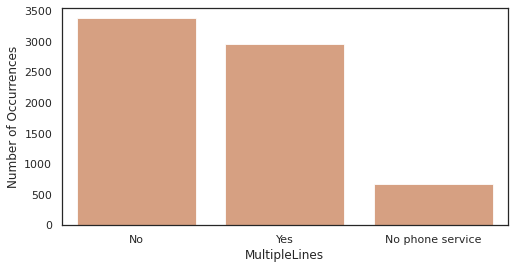

In [67]:
unigraph('MultipleLines')

Majority of the people either don't have multiple lines, or don't have a phone service altogether.

This variable renders the previous variable that is 'PhoneService' useless (redundant). So, 'PhoneService' will be dropped later. (Collinearity will be checked later).

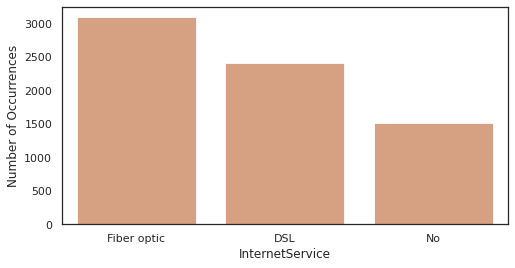

In [68]:
unigraph('InternetService')

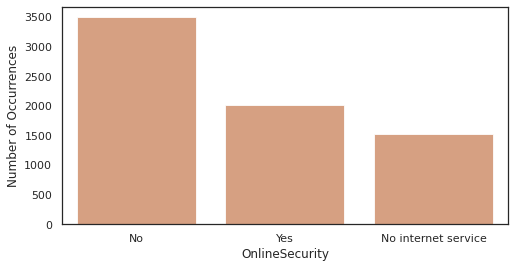

In [69]:
unigraph('OnlineSecurity')

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


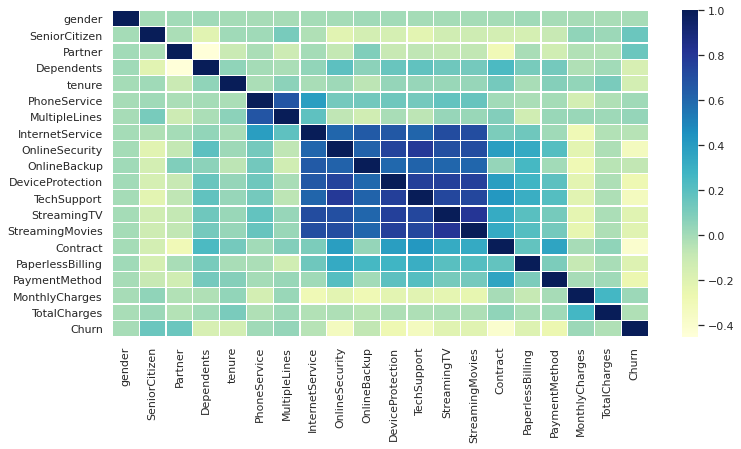

In [71]:
d1=pd.read_csv('Churn.csv',encoding='utf-8')
plt.figure(figsize=(12, 6))
hm=d1.drop(['customerID'],
        axis=1, inplace=False)
corr = hm.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

Strong multicollinearity present in these variables :
'OnlineSecurity','InternetService','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'

Also, these variables have almost no contribution towards the Churn variable, so these wil be dropped. (Keeping just one of these variables - InternetService, to capture the patterns from all these variables)

In [72]:
df.drop(['customerID','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PhoneService'],axis=1,inplace=True)

In [73]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,Female,0,Yes,No,0.013889,No phone service,DSL,Month-to-month,Yes,Electronic check,0.208842,0.004149,1
2715,Male,0,No,No,0.569444,Yes,No,Month-to-month,Yes,Bank transfer (automatic),0.212632,0.166724,0
3825,Female,0,Yes,Yes,0.722222,No,No,Two year,No,Mailed check,0.162947,0.172622,0
1807,Female,0,No,No,0.013889,No,Fiber optic,Month-to-month,No,Electronic check,0.642947,0.012775,1
132,Male,0,No,No,0.930556,No,DSL,Two year,No,Bank transfer (automatic),0.425684,0.545474,0


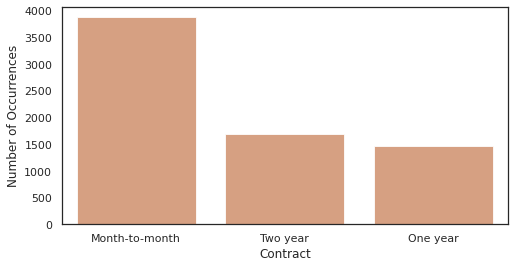

In [74]:
unigraph('Contract')

Majority of the people work under a month-to-month contract

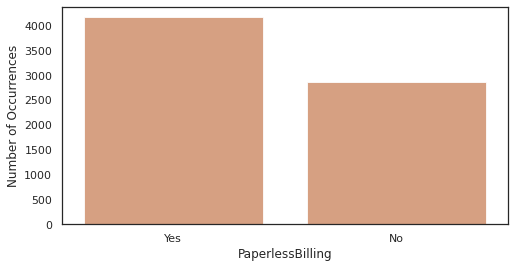

In [78]:
unigraph('PaperlessBilling')

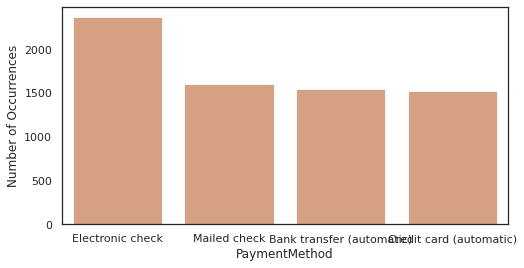

In [79]:
unigraph('PaymentMethod')

In [80]:
def barplot_percentages(feature):
    #fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
    ax1 = df.groupby(feature)['Churn'].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True')
    int_level = df[feature].value_counts()

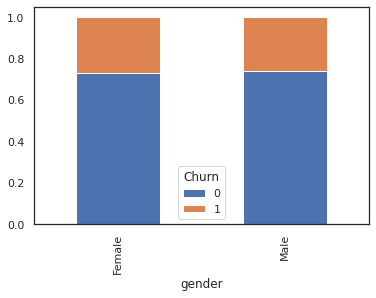

In [81]:
barplot_percentages("gender")

Equal percentage of men and women have been churning.

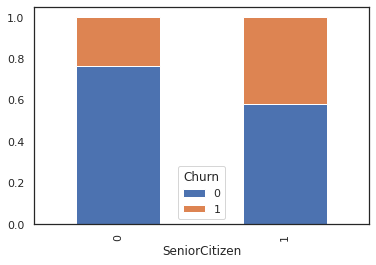

In [82]:
barplot_percentages("SeniorCitizen")

Higher % of senior citizens have churned.

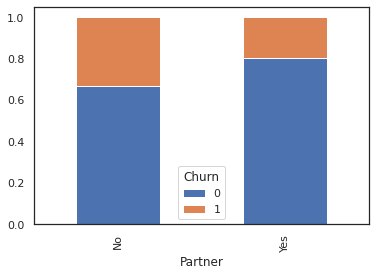

In [83]:
barplot_percentages("Partner")

Those who are single have a higher rate of churning than married people

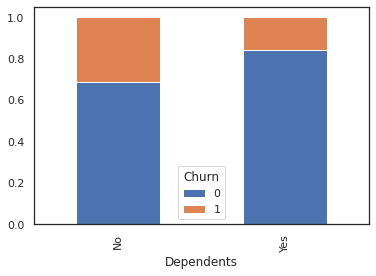

In [84]:
barplot_percentages("Dependents")

In line with Partners, those who have less dependent on them have a higher rate of churning

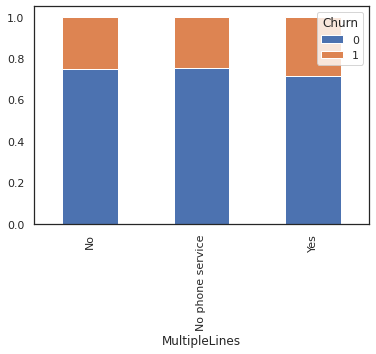

In [85]:
barplot_percentages("MultipleLines")

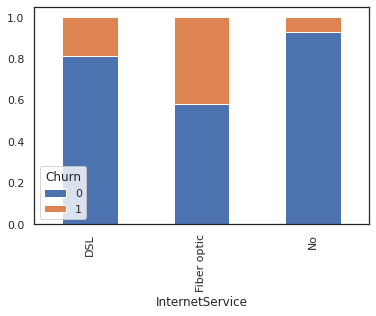

In [86]:
barplot_percentages("InternetService")

Fiber Optic owners have a higher rate of churning

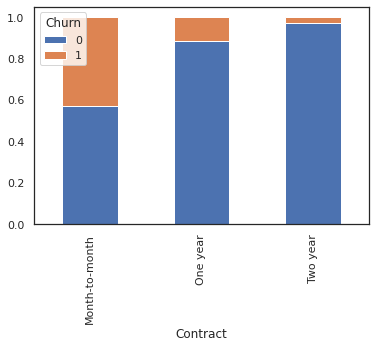

In [87]:
barplot_percentages("Contract")

Month-to-month contract holders have an astonishingly high rate of churning as compared to other contract holders.

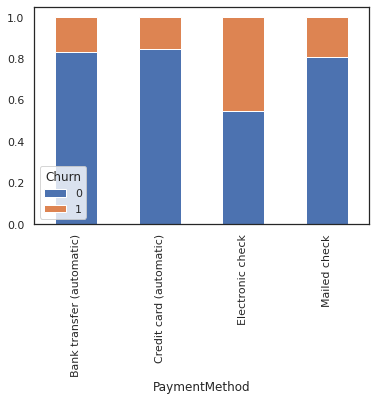

In [88]:
barplot_percentages("PaymentMethod")

Those receiving e-check have a higher rate of churning.

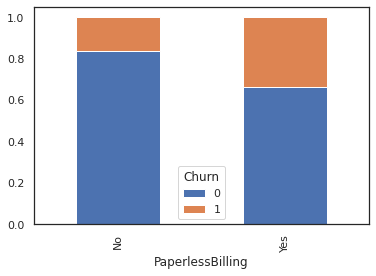

In [89]:
barplot_percentages("PaperlessBilling")

In [90]:
df=pd.get_dummies(df)

In [91]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,0,0.013889,0.208842,0.004149,1,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
2715,0,0.569444,0.212632,0.166724,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0
3825,0,0.722222,0.162947,0.172622,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1
1807,0,0.013889,0.642947,0.012775,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
132,0,0.930556,0.425684,0.545474,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0


Now all the variables are ready to be fed into the model. 

### Implement Machine Learning Models and Evaluating

In [92]:
y_train=df['Churn'][:4000]
y_test=df['Churn'][4000:]

X=df.drop(['Churn'],axis=1)
x_train=X[:4000]
x_test=X[4000:]

In [93]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((4000, 25), (3032, 25), (4000,), (3032,))

In [121]:
from sklearn.metrics import accuracy_score

### Logistic Regression 

In [122]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
lr.fit(x_train,y_train)
lr.predict(x_test)
y_pred=lr.predict(x_test)

accuracy_score(y_pred,y_test)

0.7991424802110818

### Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=4,random_state=42,min_samples_leaf=3)
dt.fit(x_train,y_train)
dt.predict(x_test)
y_pred=dt.predict(x_test)

accuracy_score(y_pred,y_test)

0.7885883905013192

### Gaussian Naive Bayes

In [126]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb.predict(x_test)
y_pred=nb.predict(x_test)

accuracy_score(y_pred,y_test)

0.7318601583113457

### Multinomial Naive Bayes

In [143]:
from sklearn.naive_bayes import MultinomialNB
nb2=MultinomialNB()
nb2.fit(x_train,y_train)
nb2.predict(x_test)
y_pred=nb2.predict(x_test)

accuracy_score(y_pred,y_test)

0.7638522427440633

### Random Forest

In [141]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=6,min_samples_leaf=3,random_state=42)
clf.fit(x_train,y_train)
clf.predict(x_test)
y_pred=clf.predict(x_test)

accuracy_score(y_pred,y_test)

0.795844327176781

In [131]:
clf.feature_importances_

array([0.02512809, 0.18531146, 0.1945442 , 0.19624283, 0.01777211,
       0.01738163, 0.01478089, 0.01460352, 0.01359552, 0.01261947,
       0.01410618, 0.00653493, 0.01418224, 0.01284324, 0.03997203,
       0.0126151 , 0.07364228, 0.00960288, 0.01467016, 0.01580286,
       0.01644392, 0.01278971, 0.01236993, 0.0412506 , 0.01119423])

In [132]:
pd.Series(clf.feature_importances_,index=x_train.columns)

SeniorCitizen                              0.025128
tenure                                     0.185311
MonthlyCharges                             0.194544
TotalCharges                               0.196243
gender_Female                              0.017772
gender_Male                                0.017382
Partner_No                                 0.014781
Partner_Yes                                0.014604
Dependents_No                              0.013596
Dependents_Yes                             0.012619
MultipleLines_No                           0.014106
MultipleLines_No phone service             0.006535
MultipleLines_Yes                          0.014182
InternetService_DSL                        0.012843
InternetService_Fiber optic                0.039972
InternetService_No                         0.012615
Contract_Month-to-month                    0.073642
Contract_One year                          0.009603
Contract_Two year                          0.014670
PaperlessBil

From this data it is clear that TotalCharges, MonthlyCharges and tenure contribute the most towards the target variable. Consequently all of these are numerical variables.

From categorical variables, the most contributing features are Contract, PaymentMethod, InternetService and SeniorCitizen (in that order).

### Gradient Boosting Decision Tree

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=RandomForestClassifier(max_depth=6,min_samples_leaf=3,random_state=42)
gbdt.fit(x_train,y_train)
gbdt.predict(x_test)
y_pred=gbdt.predict(x_test)

accuracy_score(y_pred,y_test)

0.795844327176781

### XGBoost Classifier

In [146]:
from xgboost import XGBClassifier
xgb=XGBClassifier(max_depth=6,min_samples_leaf=3,random_state=42)
xgb.fit(x_train,y_train)
xgb.predict(x_test)
y_pred=xgb.predict(x_test)

accuracy_score(y_pred,y_test)

0.7922163588390502

### Support Vector Machine

In [154]:
from sklearn.svm import SVC
svc=SVC(random_state=42)
svc.fit(x_train,y_train)
svc.predict(x_test)
y_pred=svc.predict(x_test)

accuracy_score(y_pred,y_test)

0.7925461741424802

### Final Conclusions



*   Logistic Regression performs the best on this data. The reason behind is the 
small size of the dataset and the 55:45 split of train and test data.
*   Deeper and more complex models require more data to capture the patterns in order to perform well.

*   According to the data the certain conclusions can be made :




1.   People with month-to-month contracts could be given longer contracts so that they don't churn.
2.   People with low rate of monthly and total charges could be offered some policies so that they are retained.
3.   People that have a low tenure have a high rate of tenure and they should be given better incentives to stick around.
4.   Senior Citizens have a higher churn rate and they should be focused on for them to be retained. 

*  If these actions are implemented, it can be predicted with an accuracy of approximately 80% that a person will further churn or not using this model. There is simply a need to obtain the new data from the changes and predict the churn probability for any and every new entry. 






